In [62]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [63]:

from google.colab import drive
drive.mount('/gdrive/')

Mounted at /gdrive/


In [64]:
import os
os.chdir("/gdrive/My Drive/Mnist")
!ls

2.jpg  4.png  ayakkabı.png		     MNIST_CNN.ipynb  tisort.png
3.jpg  9.jpg  Fashion_MNIST_using_CNN.ipynb  shoes.png


In [65]:
import numpy as np
import pandas as pd
import os
from __future__ import print_function
import keras
import tensorflow
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from keras import backend as K
from tensorflow.keras.utils import plot_model
from matplotlib import cm
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [67]:
#Veri setlerini yükleme
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'eğitim örnekleri')
print(x_test.shape[0], 'test örnekleri')

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

x_train shape: (60000, 28, 28)
60000 eğitim örnekleri
10000 test örnekleri
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


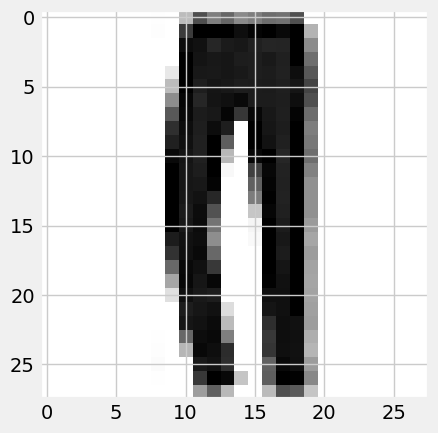

In [68]:
plt.imshow(x_test[2], cmap=cm.binary)

Data Dictionary

Each training and test example is assigned to one of the following labels:

0 : T-shirt/top

1 : Trouser

2 : Pullover

3 : Dress

4 : Coat

5 : Sandal

6 : Shirt

7 : Sneaker

8 : Bag

9 : Ankle boot

In [69]:
# fashion mnist etiket isimleri
fashion_mnist_labels = np.array([
    'Tişört/Üst',
    'Pantolon',
    'Kazak',
    'Elbise',
    'Ceket',
    'Sandalet',
    'Gömlek',
    'Sneaker',
    'Çanta',
    'Bilekte Bot'])

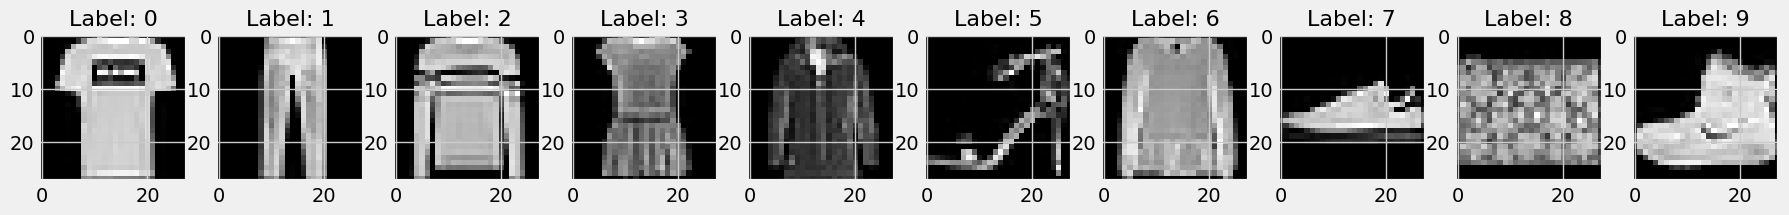

In [70]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

# Normalization, Reshape and Label Encoding
**Normalization**
* We perform a grayscale normalization to reduce the effect of illumination's differences.
* If we perform normalization, CNN works faster.

**Reshape**
* Train and test images (28 x 28)
* We reshape all data to 28x28x1 3D matrices.
* Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.

**Label Encoding**

Encode labels to one hot vectors
2 => [0,0,1,0,0,0,0,0,0,0]
4 => [0,0,0,0,1,0,0,0,0,0]

In [71]:
img_rows, img_cols = 28,28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [72]:
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

In [73]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Create Model - Fully Connected Neural Network

In [74]:
# create model
model = Sequential()
# Creating layers
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))


model.add(Conv2D(64, (3, 3), activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.25))


model.add(Flatten())


model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))


model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

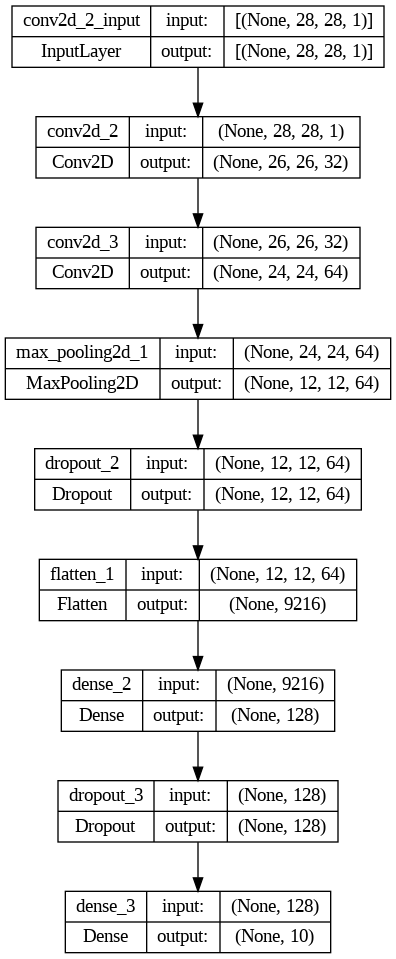

In [75]:
plot_model(model, to_file='model1.png',show_shapes=True, show_layer_names=True)

In [76]:
model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = tensorflow.keras.optimizers.Adam(),
             metrics = ['accuracy'])

In [77]:
batch_size = 128
num_classes = 10
epochs = 6
trainmodel=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/6
469/469 [==============================] - 7s 12ms/step - loss: 1.0466 - accuracy: 0.7801 - val_loss: 0.3925 - val_accuracy: 0.8600
Epoch 2/6
469/469 [==============================] - 5s 10ms/step - loss: 0.4192 - accuracy: 0.8488 - val_loss: 0.3526 - val_accuracy: 0.8697
Epoch 3/6
469/469 [==============================] - 5s 10ms/step - loss: 0.3629 - accuracy: 0.8671 - val_loss: 0.3249 - val_accuracy: 0.8817
Epoch 4/6
469/469 [==============================] - 4s 9ms/step - loss: 0.3349 - accuracy: 0.8759 - val_loss: 0.2955 - val_accuracy: 0.8925
Epoch 5/6
469/469 [==============================] - 5s 10ms/step - loss: 0.2999 - accuracy: 0.8891 - val_loss: 0.2917 - val_accuracy: 0.8971
Epoch 6/6
469/469 [==============================] - 5s 10ms/step - loss: 0.2775 - accuracy: 0.8953 - val_loss: 0.2776 - val_accuracy: 0.9008


In [83]:
#model.evaluate() yöntemi genellikle bir ölçüm metriği olan kayıp (loss) ve doğruluk (accuracy) gibi değerleri döndürür
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 0.27760595083236694
Test Accuracy: 0.9007999897003174


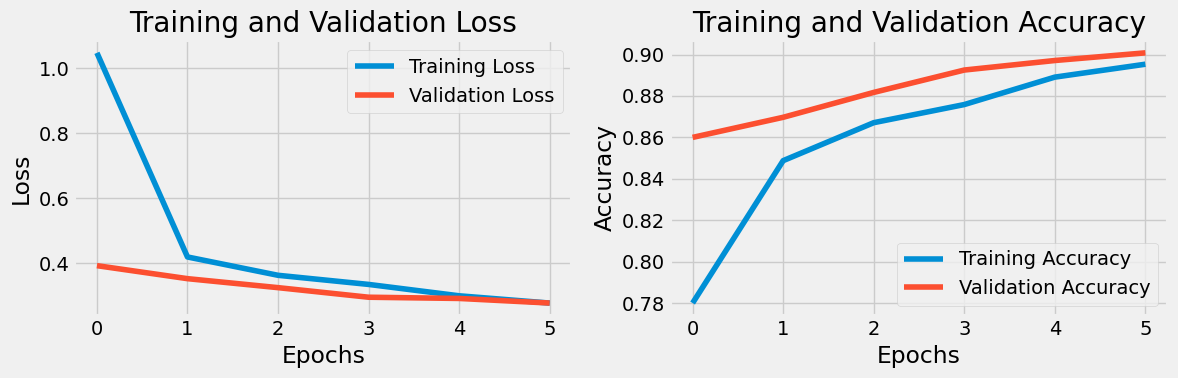

In [84]:
plt.figure(figsize=(12, 4))

# Eğitim ve doğrulama kaybı
plt.subplot(1, 2, 1)
plt.plot(trainmodel.history['loss'], label='Training Loss')
plt.plot(trainmodel.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Eğitim ve doğrulama doğruluğu
plt.subplot(1, 2, 2)
plt.plot(trainmodel.history['accuracy'], label='Training Accuracy')
plt.plot(trainmodel.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


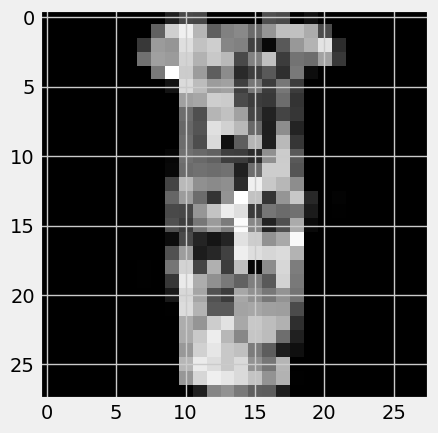

In [85]:
test_image = x_test[100]
y_test[32]
plt.imshow(test_image.reshape(28,28), cmap='gray', vmin=2, vmax=255)

1/1 [==============================] - 0s 19ms/step


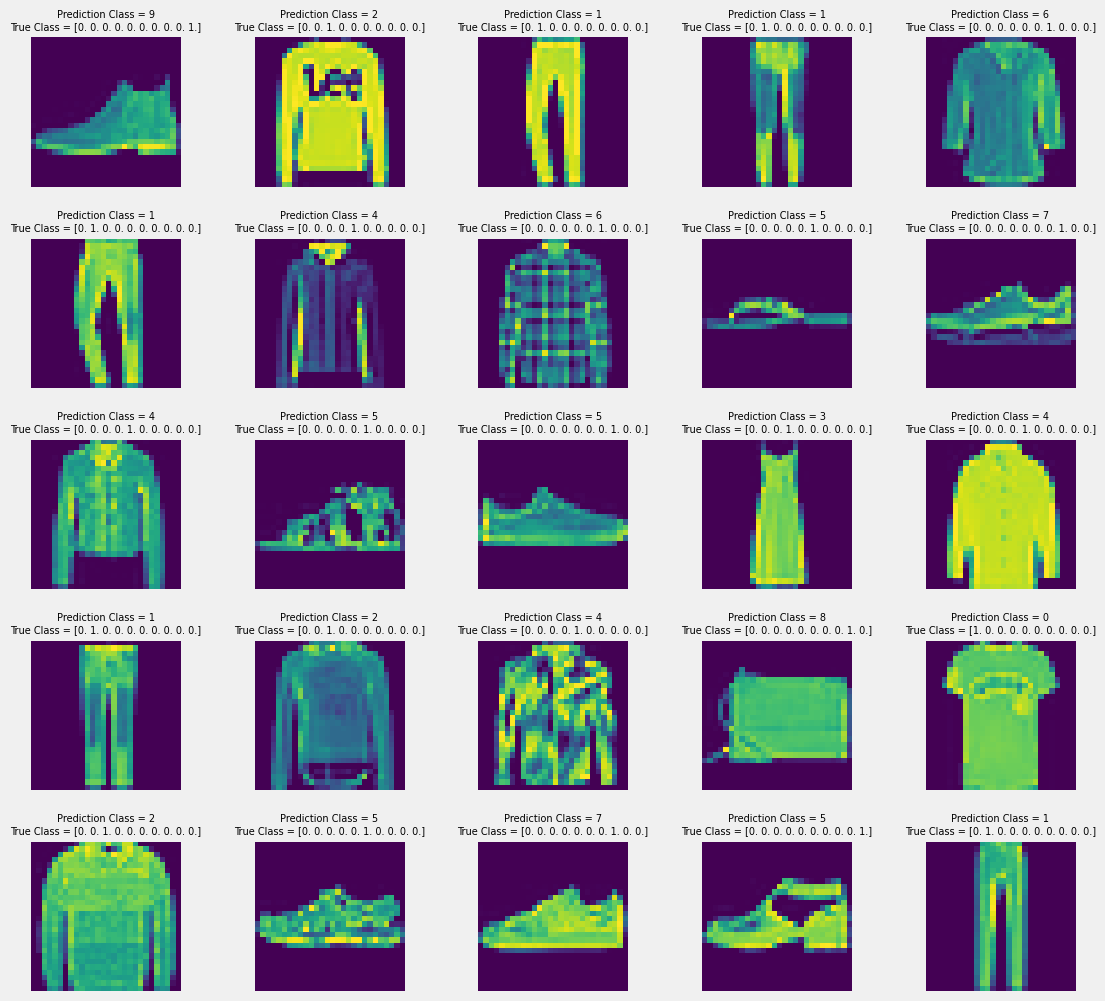

In [86]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    prediction = model.predict(x_test[i].reshape(1, 28, 28, 1))  # Model ile tahmin
    pred_class = np.argmax(prediction)  # En yüksek olasılığa sahip sınıf

    axes[i].imshow(x_test[i].reshape(28, 28))
    axes[i].set_title(f"Prediction Class = {pred_class}\nTrue Class = {y_test[i]}", fontsize=7)
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


In [87]:
!ls

2.jpg  4.png  ayakkabı.png		     MNIST_CNN.ipynb  shoes.png
3.jpg  9.jpg  Fashion_MNIST_using_CNN.ipynb  model1.png       tisort.png


1/1 [==============================] - 0s 62ms/step


(-0.5, 27.5, 27.5, -0.5)

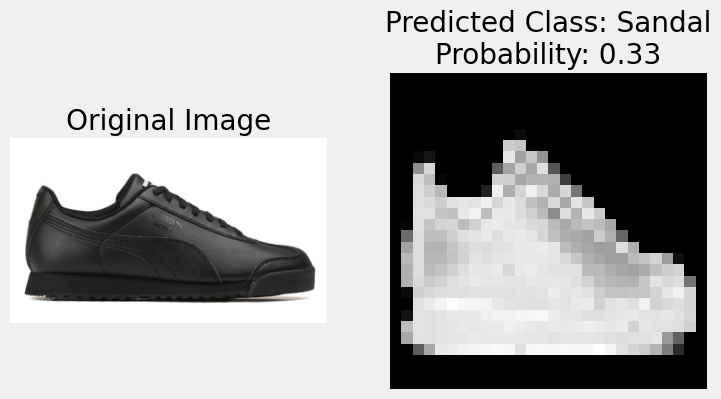

In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

file_path =  r'/gdrive/My Drive/Mnist/ayakkabı.png'
img = cv2.imread(file_path , cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (100, 100))
img = cv2.resize(img, (28, 28))
img = cv2.bitwise_not(img)
img = img / 255.0

input_data = np.array([img])
input_data = input_data.reshape(input_data.shape[0], 28, 28, 1)  # Veri şeklini modelinizin beklediği şekle dönüştürüldü

# # Tahmin yapın
fashion_mnist_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

prediction = model.predict(input_data)
predicted_class = np.argmax(prediction)
predicted_label = fashion_mnist_labels[predicted_class]

predicted_prob = np.max(prediction)  # En yüksek olasılığı alın
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Orijinal fotoğraf
axes[0].imshow(cv2.cvtColor(cv2.imread(file_path), cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis('off')
# Tahmin fotografı
axes[1].imshow(img, cmap='gray')
axes[1].set_title(f"Predicted Class: {predicted_label}\nProbability: {predicted_prob:.2f}")
axes[1].axis('off')


